# 10 Minutes to pandas

In [0]:
import numpy as np
import pandas as pd

## Object creation

In [2]:
s = pd.Series([1, 3, 4, np.nan, 6, 8])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64

Membuat Series dengan melewatkan list nilai, membuat pandas membuat index integer default. pd.Series adalah fungsi untuk membuat Series. 

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

**date_range** digunakan untuk membuat DataFrame dengan index waktu dan kolom berlabel.

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.839471,0.908877,-0.274461,-0.763431
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698
2013-01-04,0.765792,-2.578609,1.013808,1.327477
2013-01-05,0.830345,-0.620411,0.733071,1.211272
2013-01-06,-1.653750,0.721921,-0.124729,0.370010


fungsi **DataFrame** membuat data dalam bentuk tabel dengan label.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes # untuk melihat tipe data uang ada pada DataFrame

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [13]:
df.head () # untuk menampilkan data pada dataframe sebanyak 5 data

,A,B,C,D
2013-01-01,-0.839471,0.908877,-0.274461,-0.763431
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698
2013-01-04,0.765792,-2.578609,1.013808,1.327477
2013-01-05,0.830345,-0.620411,0.733071,1.211272


In [15]:
df.index # untuk menampilkan index 

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns # untuk menampilkan kolom yang ada pada Dataframe

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.to_numpy() # untuk konversi dataframe ke array numpy

array([[-0.83947136,  0.90887657, -0.27446058, -0.76343132],
       [ 0.23551032,  0.40176592,  0.81852078, -0.14472853],
       [ 1.50134358,  0.29409735,  0.23725977, -0.12169802],
       [ 0.76579165, -2.57860853,  1.01380839,  1.32747701],
       [ 0.83034485, -0.62041052,  0.73307056,  1.21127203],
       [-1.65374996,  0.7219211 , -0.12472878,  0.3700104 ]])

In [19]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [20]:
df.describe() # untuk menampilkan ringkasan statitik dari data

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.139962,-0.145393,0.400578,0.313150
std,1.175370,1.304027,0.532837,0.824195
min,-1.653750,-2.578609,-0.274461,-0.763431
25%,-0.570726,-0.391784,-0.034232,-0.138971
50%,0.500651,0.347932,0.485165,0.124156
75%,0.814207,0.641882,0.797158,1.000957
max,1.501344,0.908877,1.013808,1.327477


In [21]:
df.T # untuk mentranspose data artinya menukar kolom jadi baris

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.839471,0.235510,1.501344,0.765792,0.830345,-1.653750
B,0.908877,0.401766,0.294097,-2.578609,-0.620411,0.721921
C,-0.274461,0.818521,0.237260,1.013808,0.733071,-0.124729
D,-0.763431,-0.144729,-0.121698,1.327477,1.211272,0.370010


In [22]:
df.sort_index(axis=1, ascending=False) # mengurutkan berdasarkan axis

,D,C,B,A
2013-01-01,-0.763431,-0.274461,0.908877,-0.839471
2013-01-02,-0.144729,0.818521,0.401766,0.235510
2013-01-03,-0.121698,0.237260,0.294097,1.501344
2013-01-04,1.327477,1.013808,-2.578609,0.765792
2013-01-05,1.211272,0.733071,-0.620411,0.830345
2013-01-06,0.370010,-0.124729,0.721921,-1.653750


In [25]:
df.sort_values(by='B') # mengurutkan berdasarkan nilai

,A,B,C,D
2013-01-04,0.765792,-2.578609,1.013808,1.327477
2013-01-05,0.830345,-0.620411,0.733071,1.211272
2013-01-03,1.501344,0.294097,0.237260,-0.121698
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-06,-1.653750,0.721921,-0.124729,0.370010
2013-01-01,-0.839471,0.908877,-0.274461,-0.763431


## Selection

### Getting

In [26]:
df['A'] # memilih satu kolom

2013-01-01   -0.839471
2013-01-02    0.235510
2013-01-03    1.501344
2013-01-04    0.765792
2013-01-05    0.830345
2013-01-06   -1.653750
Freq: D, Name: A, dtype: float64

In [27]:
df[0:3] # memilih dengan [] yang mengiris baris
        # yaitu menampilkan data index 0 sampai 3(index 3 tidak termasuk)

,A,B,C,D
2013-01-01,-0.839471,0.908877,-0.274461,-0.763431
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698


In [28]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698
2013-01-04,0.765792,-2.578609,1.013808,1.327477


### Selection by label

In [29]:
df.loc[dates[0]] # untuk menampilkan data berdasarkan label pada dates index ke 0

A   -0.839471
B    0.908877
C   -0.274461
D   -0.763431
Name: 2013-01-01 00:00:00, dtype: float64

In [30]:
df.loc[:, ['A', 'B']] # memilih pada multi-axis dengan label

,A,B
2013-01-01,-0.839471,0.908877
2013-01-02,0.235510,0.401766
2013-01-03,1.501344,0.294097
2013-01-04,0.765792,-2.578609
2013-01-05,0.830345,-0.620411
2013-01-06,-1.653750,0.721921


In [32]:
df.loc['20130102':'20130104', ['A', 'B']] # memilih berdasarkan label dengan menentukan data yang ditampilkan

,A,B
2013-01-02,0.235510,0.401766
2013-01-03,1.501344,0.294097
2013-01-04,0.765792,-2.578609


In [33]:
df.loc['20130102', ['A', 'B']] # memilih menampilkan data pada label dengan data pada baris yang dimaksud

A    0.235510
B    0.401766
Name: 2013-01-02 00:00:00, dtype: float64

In [34]:
df.loc[dates[0], 'A'] # untuk mendapatkan nilai skalar

-0.8394713571889467

In [35]:
df.at[dates[0], 'A'] # untuk mendapatkan nilai akses ke skalar

-0.8394713571889467

### Selection by position

In [36]:
df.iloc[3] # memilih melalui posisi bilangan bulat yang dilewati

A    0.765792
B   -2.578609
C    1.013808
D    1.327477
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df.iloc[3:5, 0:2] # memilih baris index dari dan batas kemudian kolom ke dan batas

,A,B
2013-01-04,0.765792,-2.578609
2013-01-05,0.830345,-0.620411


In [38]:
df.iloc[1:3, :] # untuk mengiris baris secara eksplisit

,A,B,C,D
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698


In [39]:
df.iloc[:, 1:3] # untuk mengiris kolom secara eksplisit

,B,C
2013-01-01,0.908877,-0.274461
2013-01-02,0.401766,0.818521
2013-01-03,0.294097,0.237260
2013-01-04,-2.578609,1.013808
2013-01-05,-0.620411,0.733071
2013-01-06,0.721921,-0.124729


In [40]:
df.iloc[1, 1] # untuk mendapatkan nilai secara eksplisit

0.40176592203897504

In [41]:
df.iat[1, 1] # untuk mendapatkan akses cepat ke skalar

0.40176592203897504

### Boolean indexing

In [42]:
df[df['A'] > 0] # menggunakan nilai satu kolom untuk memilih data

,A,B,C,D
2013-01-02,0.235510,0.401766,0.818521,-0.144729
2013-01-03,1.501344,0.294097,0.237260,-0.121698
2013-01-04,0.765792,-2.578609,1.013808,1.327477
2013-01-05,0.830345,-0.620411,0.733071,1.211272


In [43]:
df[df > 0] # memilih nilai dari dataframe tempat kondisi boolean terpenuhi

,A,B,C,D
2013-01-01,NaN,0.908877,NaN,NaN
2013-01-02,0.235510,0.401766,0.818521,NaN
2013-01-03,1.501344,0.294097,0.237260,NaN
2013-01-04,0.765792,NaN,1.013808,1.327477
2013-01-05,0.830345,NaN,0.733071,1.211272
2013-01-06,NaN,0.721921,NaN,0.370010


In [45]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.839471,0.908877,-0.274461,-0.763431,one
2013-01-02,0.235510,0.401766,0.818521,-0.144729,one
2013-01-03,1.501344,0.294097,0.237260,-0.121698,two
2013-01-04,0.765792,-2.578609,1.013808,1.327477,three
2013-01-05,0.830345,-0.620411,0.733071,1.211272,four
2013-01-06,-1.653750,0.721921,-0.124729,0.370010,three


In [46]:
# method isin() digunakan untuk memeriksa apakah nilai terkandung dalam data
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.501344,0.294097,0.237260,-0.121698,two
2013-01-05,0.830345,-0.620411,0.733071,1.211272,four


### Setting

In [47]:
# Mengatur kolom baru secara otomatis menyelaraskan data dengan indeks.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
# Menetapkan nilai berdasarkan label
df.at[dates[0], 'A'] = 0

In [0]:
# Menetapkan nilai berdasarkan posisi
df.iat[0, 1] = 0

In [50]:
# menetapkan dengan array NumPy
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.274461,5
2013-01-02,0.235510,0.401766,0.818521,5
2013-01-03,1.501344,0.294097,0.237260,5
2013-01-04,0.765792,-2.578609,1.013808,5
2013-01-05,0.830345,-0.620411,0.733071,5
2013-01-06,-1.653750,0.721921,-0.124729,5


In [53]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.274461,-5
2013-01-02,-0.235510,-0.401766,-0.818521,-5
2013-01-03,-1.501344,-0.294097,-0.237260,-5
2013-01-04,-0.765792,-2.578609,-1.013808,-5
2013-01-05,-0.830345,-0.620411,-0.733071,-5
2013-01-06,-1.653750,-0.721921,-0.124729,-5


## Missing data

In [0]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

Reindexing memungkinkan Anda untuk mengubah / menambah / menghapus indeks pada sumbu yang ditentukan. Ini mengembalikan salinan data.

In [0]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [56]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.274461,5,1.0
2013-01-02,0.235510,0.401766,0.818521,5,1.0
2013-01-03,1.501344,0.294097,0.237260,5,NaN
2013-01-04,0.765792,-2.578609,1.013808,5,NaN


In [57]:
# Menghapus setiap baris yang memiliki missing data.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.00000,0.000000,-0.274461,5,1.0
2013-01-02,0.23551,0.401766,0.818521,5,1.0


In [58]:
# Mengisi data yang hilang.
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-0.274461,5,1.0
2013-01-02,0.235510,0.401766,0.818521,5,1.0
2013-01-03,1.501344,0.294097,0.237260,5,5.0
2013-01-04,0.765792,-2.578609,1.013808,5,5.0


In [59]:
# mendapatkan boolean mask dimana nilainya adalah nan
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

### Stats

In [60]:
# Melakukan statistik deskriptif
# Mencari rata-rata
df.mean()

A    0.279873
B   -0.296872
C    0.400578
D    5.000000
dtype: float64

In [61]:
# Operasi yang sama pada sumbu lainnya
df.mean(1)

2013-01-01    1.181385
2013-01-02    1.613949
2013-01-03    1.758175
2013-01-04    1.050248
2013-01-05    1.485751
2013-01-06    0.985861
Freq: D, dtype: float64

In [62]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.501344,-0.705903,-0.762740,4.0
2013-01-04,-2.234208,-5.578609,-1.986192,2.0
2013-01-05,-4.169655,-5.620411,-4.266929,0.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply 

In [64]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.274461,5
2013-01-02,0.235510,0.401766,0.544060,10
2013-01-03,1.736854,0.695863,0.781320,15
2013-01-04,2.502646,-1.882745,1.795128,20
2013-01-05,3.332990,-2.503156,2.528199,25
2013-01-06,1.679240,-1.781235,2.403470,30


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.155094
B    3.300530
C    1.288269
D    0.000000
dtype: float64

### Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    0
2    0
3    5
4    2
5    3
6    2
7    4
8    5
9    6
dtype: int64

In [68]:
s.value_counts()

5    3
2    2
0    2
6    1
4    1
3    1
dtype: int64

### String Methods

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [70]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.923973,-0.628762,0.891693,-0.941628
1,-0.294133,1.551636,0.086658,-1.238405
2,0.846753,1.267447,2.311814,-0.003444
3,1.649559,0.292192,0.102523,2.159931
4,-0.396032,-0.192657,-1.171288,0.754992
5,0.841491,1.352758,0.056358,-0.805630
6,-0.492370,0.530583,0.530432,1.081063
7,-0.928744,0.217483,0.249795,-1.544486
8,1.385877,-2.131523,-0.408932,-1.004390
9,0.263751,0.250620,-0.573193,-0.817116


In [0]:
# memecahnya menjadi beberapa bagian
pieces = [df[:3], df[3:7], df[7:]]

In [72]:
pd.concat(pieces)

,0,1,2,3
0,-0.923973,-0.628762,0.891693,-0.941628
1,-0.294133,1.551636,0.086658,-1.238405
2,0.846753,1.267447,2.311814,-0.003444
3,1.649559,0.292192,0.102523,2.159931
4,-0.396032,-0.192657,-1.171288,0.754992
5,0.841491,1.352758,0.056358,-0.805630
6,-0.492370,0.530583,0.530432,1.081063
7,-0.928744,0.217483,0.249795,-1.544486
8,1.385877,-2.131523,-0.408932,-1.004390
9,0.263751,0.250620,-0.573193,-0.817116


### Join

In [0]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [0]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,foo,2


In [76]:
right

,key,rval
0,foo,4
1,foo,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [0]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [0]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [80]:
left

,key,lval
0,foo,1
1,bar,2


In [81]:
right

,key,rval
0,foo,4
1,bar,5


In [82]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In [0]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [84]:
df

,A,B,C,D
0,foo,one,-2.349260,0.290365
1,bar,one,1.579231,0.177526
2,foo,two,-1.578909,-1.092601
3,bar,three,-0.905815,0.533011
4,foo,two,1.069150,0.233601
5,bar,two,0.899250,-1.400424
6,foo,one,0.166863,0.700227
7,foo,three,0.558290,-0.175339


In [85]:
# Mengelompokkan dan kemudian menerapkan fungsi jumlah () ke grup yang dihasilkan.
df.groupby('A').sum()

,C,D
A,,
bar,1.572666,-0.689888
foo,-2.133867,-0.043748


In [86]:
# Mengelompokkan berdasarkan beberapa kolom membentuk indeks hierarkis, dan menerapkan fungsi sum
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.579231  0.177526
    three -0.905815  0.533011
    two    0.899250 -1.400424
foo one   -2.182397  0.990591
    three  0.558290 -0.175339
    two   -0.509759 -0.859000

## Reshaping

### Stack

In [0]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']])) 

In [0]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [0]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [0]:
df2 = df[:4]

In [91]:
df2

A         B
first second                    
bar   one     0.976931  0.425178
      two    -0.880126 -1.342561
baz   one     0.314802 -0.090336
      two     0.594475  0.725317

In [0]:
# Method stack() "compress" level di kolom DataFrame
stacked = df2.stack()

In [93]:
stacked

first  second   
bar    one     A    0.976931
               B    0.425178
       two     A   -0.880126
               B   -1.342561
baz    one     A    0.314802
               B   -0.090336
       two     A    0.594475
               B    0.725317
dtype: float64

In [94]:
stacked.unstack()

A         B
first second                    
bar   one     0.976931  0.425178
      two    -0.880126 -1.342561
baz   one     0.314802 -0.090336
      two     0.594475  0.725317

In [95]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.976931 -0.880126
      B  0.425178 -1.342561
baz   A  0.314802  0.594475
      B -0.090336  0.725317

In [96]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.976931  0.314802
       B  0.425178 -0.090336
two    A -0.880126  0.594475
       B -1.342561  0.725317

### Pivot tables

In [0]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [98]:
df

,A,B,C,D,E
0,one,A,foo,-0.520107,-0.115216
1,one,B,foo,1.533964,-1.329999
2,two,C,foo,1.062732,-1.271079
3,three,A,bar,0.279967,-1.387544
4,one,B,bar,0.445803,1.561869
5,one,C,bar,0.426718,-1.152270
6,two,A,foo,0.266543,3.111646
7,three,B,foo,-0.507026,-0.613790
8,one,C,foo,0.874843,-1.625815
9,one,A,bar,0.485497,-0.279659


In [99]:
# Membuat tabel pivot
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.485497 -0.520107
      B  0.445803  1.533964
      C  0.426718  0.874843
three A  0.279967       NaN
      B       NaN -0.507026
      C -0.891034       NaN
two   A       NaN  0.266543
      B -0.778969       NaN
      C       NaN  1.062732

## Time series

In [0]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [0]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [102]:
ts.resample('5Min').sum()

2012-01-01    24375
Freq: 5T, dtype: int64

In [0]:
# Representasi zona waktu
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06   -1.507533
2012-03-07   -0.977358
2012-03-08   -0.266181
2012-03-09   -1.641481
2012-03-10    1.447395
Freq: D, dtype: float64

In [0]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00   -1.507533
2012-03-07 00:00:00+00:00   -0.977358
2012-03-08 00:00:00+00:00   -0.266181
2012-03-09 00:00:00+00:00   -1.641481
2012-03-10 00:00:00+00:00    1.447395
Freq: D, dtype: float64

In [109]:
# Konversi ke zona waktu lain
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.507533
2012-03-06 19:00:00-05:00   -0.977358
2012-03-07 19:00:00-05:00   -0.266181
2012-03-08 19:00:00-05:00   -1.641481
2012-03-09 19:00:00-05:00    1.447395
Freq: D, dtype: float64

In [0]:
# Konversi antara representasi rentang waktu
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [0]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [112]:
ts

2012-01-31    1.532705
2012-02-29   -0.338523
2012-03-31   -0.378008
2012-04-30   -0.800734
2012-05-31   -1.445570
Freq: M, dtype: float64

In [0]:
ps = ts.to_period()

In [114]:
ps

2012-01    1.532705
2012-02   -0.338523
2012-03   -0.378008
2012-04   -0.800734
2012-05   -1.445570
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01    1.532705
2012-02-01   -0.338523
2012-03-01   -0.378008
2012-04-01   -0.800734
2012-05-01   -1.445570
Freq: MS, dtype: float64

Mengonversi frekuensi triwulanan dengan tahun yang berakhir pada November hingga 9 pagi di akhir bulan setelah akhir kuartal

In [0]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [0]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [0]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -0.704474
1990-06-01 09:00   -0.571832
1990-09-01 09:00   -0.164320
1990-12-01 09:00    0.371894
1991-03-01 09:00   -0.646428
Freq: H, dtype: float64

## Categoricals

In [0]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [0]:
# Ubah nilai mentah menjadi tipe data kategorikal.
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [0]:
# Ubah nama kategori menjadi nama yang lebih bermakna
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [0]:
# Atur ulang kategori dan secara bersamaan tambahkan kategori yang hilang
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])        

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Penyortiran adalah per pesanan dalam kategori, bukan urutan leksikal.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Pengelompokan berdasarkan kolom kategoris juga menunjukkan kategori kosong.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.close('all')

In [0]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [0]:
ts = ts.cumsum()

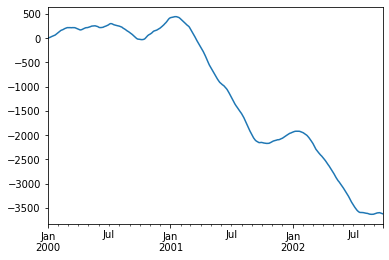

In [133]:
ts.plot()

In [0]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [0]:
df = df.cumsum()

In [137]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

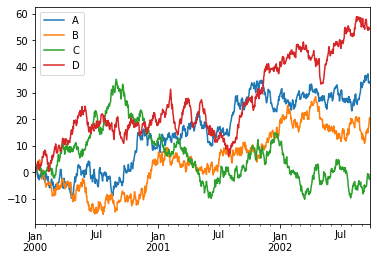

In [138]:
df.plot()

## Getting data in/out

### CSV

In [0]:
# Menulis ke file csv
df.to_csv('foo.csv')

In [141]:
# Membaca file csv
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.609969,-1.501680,0.510037,0.671874
1,2000-01-02,-0.190389,-1.345185,-0.166455,1.373241
2,2000-01-03,1.775985,0.188264,0.940014,0.983054
3,2000-01-04,0.804823,1.285871,1.661278,1.114160
4,2000-01-05,1.357122,1.377255,1.604105,2.091667
...,...,...,...,...,...
995,2002-09-22,33.795673,17.309314,-0.708539,54.868929
996,2002-09-23,33.748203,18.174094,-1.822700,53.974652
997,2002-09-24,34.080979,20.228190,-2.519147,54.166102
998,2002-09-25,33.958024,20.697549,-1.878820,54.272449


### HDF5

In [0]:
# Menulis ke HDF5 Store
df.to_hdf('foo.h5', 'df')

In [143]:
# Membaca dari HDF5 Store
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.609969,-1.501680,0.510037,0.671874
2000-01-02,-0.190389,-1.345185,-0.166455,1.373241
2000-01-03,1.775985,0.188264,0.940014,0.983054
2000-01-04,0.804823,1.285871,1.661278,1.114160
2000-01-05,1.357122,1.377255,1.604105,2.091667
...,...,...,...,...
2002-09-22,33.795673,17.309314,-0.708539,54.868929
2002-09-23,33.748203,18.174094,-1.822700,53.974652
2002-09-24,34.080979,20.228190,-2.519147,54.166102
2002-09-25,33.958024,20.697549,-1.878820,54.272449


### Excel

In [0]:
# Menulis file excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [145]:
# Membaca file excel
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.609969,-1.501680,0.510037,0.671874
1,2000-01-02,-0.190389,-1.345185,-0.166455,1.373241
2,2000-01-03,1.775985,0.188264,0.940014,0.983054
3,2000-01-04,0.804823,1.285871,1.661278,1.114160
4,2000-01-05,1.357122,1.377255,1.604105,2.091667
...,...,...,...,...,...
995,2002-09-22,33.795673,17.309314,-0.708539,54.868929
996,2002-09-23,33.748203,18.174094,-1.822700,53.974652
997,2002-09-24,34.080979,20.228190,-2.519147,54.166102
998,2002-09-25,33.958024,20.697549,-1.878820,54.272449


## Gotchas

In [146]:
if pd.Series([False, True, False]):
  print("I was true")

ValueError: ignored